<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C2/W1/ungraded_lab/C2_W1_Lab_1_damage_vs_no_damage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this Lab I would be redoing the hurricane damage dataset I encountered on my first attempt at my tensorflow development certifidamageion. 

**IMPORTANT NOTE:** This notebook is designed to run as a Colab. Running it on your local machine might result in some of the code blocks throwing errors.

## Check is the GPU available

I been through the trouble of obtaining an Aero 16 2022 with RTX 3070 Ti to pass the exam. It is totally unreasonable to have the GPU not integrated when writing the exam

The following script tests wether or not the GPU is installed. There is alot of warnings complaining that NUMA is not installed. I would just ignore them for now. 

In [1]:
# import tensorflow
import tensorflow as tf

# Test GPU name
gpu_name = tf.test.gpu_device_name()
print(f"GPU Name: {gpu_name}")

# Test GPU device
gpu_device = tf.test.gpu_device_name()
print(f"GPU Device: {gpu_device}")

# Test CUDA version
cuda_built = tf.test.is_built_with_cuda()
print(f"Is TensorFlow built with CUDA? {cuda_built}")

# List physical GPU devices
physical_devices = tf.config.list_physical_devices('GPU')
print(f"Physical GPU Devices: {physical_devices}")


2023-09-05 21:35:41.518178: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-05 21:35:41.839961: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-05 21:35:45.164332: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is GPU available? True
GPU Name: /device:GPU:0
GPU Device: /device:GPU:0
Is TensorFlow built with CUDA? True
Physical GPU Devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-09-05 21:35:45.785661: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-05 21:35:45.875445: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-05 21:35:45.875485: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-05 21:35:46.519017: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-05 21:35:46.519211: I tensorflow/compile

You will then extract it to the current directory.

In [2]:
import zipfile

# Unzip the archive
local_zip = './satellitehurricaneimages.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall()

zip_ref.close()

The contents of the .zip are extracted to the base directory `./damage_and_no_damage_filtered`, which contains `train` and `validation` subdirectories for the training and validation datasets (you can ignore `vectorize.py` in the output in the next cell). 

If you recall, the **training set** is the data that is used to tell the neural network model that 'this is what a damage looks like' and 'this is what a no_damage looks like'. The **validation set** is images of damage and no_damage that the neural network will not see as part of the training. You can use this to test how well or how badly it does in evaluating if an image contains a damage or a no_damage. (See the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/validation/check-your-intuition) if you want a refresher on training, validation, and test sets.)

These subdirectories in turn each contain `damage` and `no_damage` subdirectories.

In [3]:
import os

base_dir = os.getcwd()

print("Contents of base directory:")
print(os.listdir(base_dir))

train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

print("\nContents of train directory:")
print(os.listdir(train_dir))

print("\nContents of validation directory:")
print(os.listdir(validation_dir))


Contents of base directory:
['.git', '.idea', '.ipynb_checkpoints', 'cuda-keyring_1.0-1_all.deb', 'cuda-keyring_1.0-1_all.deb.1', 'cuda-repo-ubuntu2204-12-2-local_12.2.2-535.104.05-1_amd64.deb', 'cuda-repo-ubuntu2204-12-2-local_12.2.2-535.104.05-1_amd64.deb.1', 'cuda-repo-wsl-ubuntu-11-8-local_11.8.0-1_amd64.deb', 'cuda-repo-wsl-ubuntu-11-8-local_11.8.0-1_amd64.deb.1', 'cudainstall-11.8.sh', 'cudainstall-12.2.sh', 'LICENSE.txt', 'my_model.h5', 'notebook.ipynb', 'README.md', 'requirement.txt', 'satellitehurricaneimages.zip', 'Take2-hurricane-damage.ipynb', 'tensorflow_gpu_test.py', 'train', 'validation', 'venv']

Contents of train directory:
['.DS_Store', 'damage', 'no_damage']

Contents of validation directory:
['.DS_Store', 'damage', 'no_damage']


You can assign each of these directories to a variable so you can use it later.

In [4]:
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training damage/no_damage pictures
train_damage_dir = os.path.join(train_dir, 'damage')
train_no_damage_dir = os.path.join(train_dir, 'no_damage')

# Directory with validation damage/no_damage pictures
validation_damage_dir = os.path.join(validation_dir, 'damage')
validation_no_damage_dir = os.path.join(validation_dir, 'no_damage')


Now see what the filenames look like in the `damage` and `no_damage` `train` directories (file naming conventions are the same in the `validation` directory):

In [5]:
train_damage_fnames = os.listdir( train_damage_dir )
train_no_damage_fnames = os.listdir( train_no_damage_dir )

print(train_damage_fnames[:10])
print(train_no_damage_fnames[:10])

['-93.55964_30.895018.jpeg', '-93.573763_30.693981.jpeg', '-93.578271_30.779923999999998.jpeg', '-93.59011_30.695412.jpeg', '-93.59030899999999_30.694764000000003.jpeg', '-93.590598_30.694956.jpeg', '-93.597636_30.674362.jpeg', '-93.599611_30.668616999999998.jpeg', '-93.601916_30.793329999999997.jpeg', '-93.602625_30.02372.jpeg']
['-95.061275_29.831535.jpeg', '-95.061412_29.826522999999998.jpeg', '-95.061825_29.828608000000003.jpeg', '-95.061908_29.828245000000003.jpeg', '-95.061936_29.828088.jpeg', '-95.062117_29.828828.jpeg', '-95.06212_29.829257000000002.jpeg', '-95.062166_29.828609999999998.jpeg', '-95.062166_29.82945.jpeg', '-95.06218199999999_29.82831.jpeg']


Let's find out the total number of damage and no_damage images in the `train` and `validation` directories:

In [6]:
print('total training damage images :', len(os.listdir(      train_damage_dir ) ))
print('total training no_damage images :', len(os.listdir(      train_no_damage_dir ) ))

print('total validation damage images :', len(os.listdir( validation_damage_dir ) ))
print('total validation no_damage images :', len(os.listdir( validation_no_damage_dir ) ))

total training damage images : 5000
total training no_damage images : 5000
total validation damage images : 1000
total validation no_damage images : 1000


For both damage and no_damage, you have 1,000 training images and 500 validation images.

Now take a look at a few pictures to get a better sense of what the damage and no_damage datasets look like. First, configure the `matplotlib` parameters:

In [7]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics


pic_index+=8

In [8]:
next_damage_pix = [os.path.join(train_damage_dir, fname) 
                for fname in train_damage_fnames[ pic_index-8:pic_index] 
               ]
next_no_damage_pix = [os.path.join(train_no_damage_dir, fname) 
                for fname in train_no_damage_fnames[ pic_index-8:pic_index]
               ]

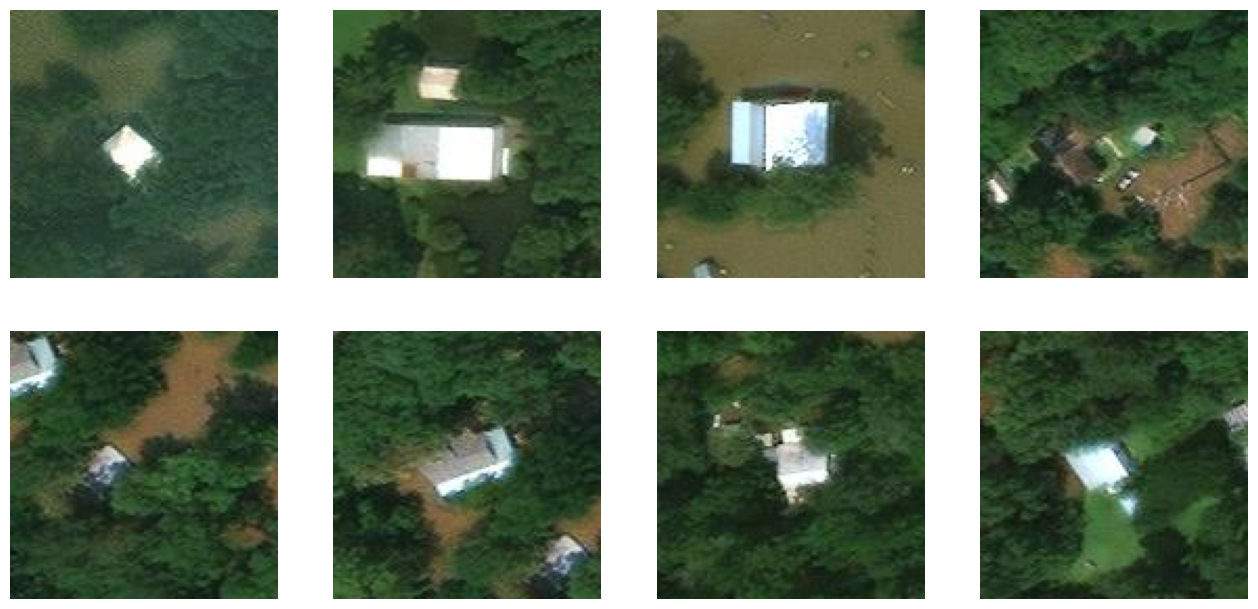

In [9]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
for i, img_path in enumerate(next_damage_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


Here is a batch of 8 Damaged Houses

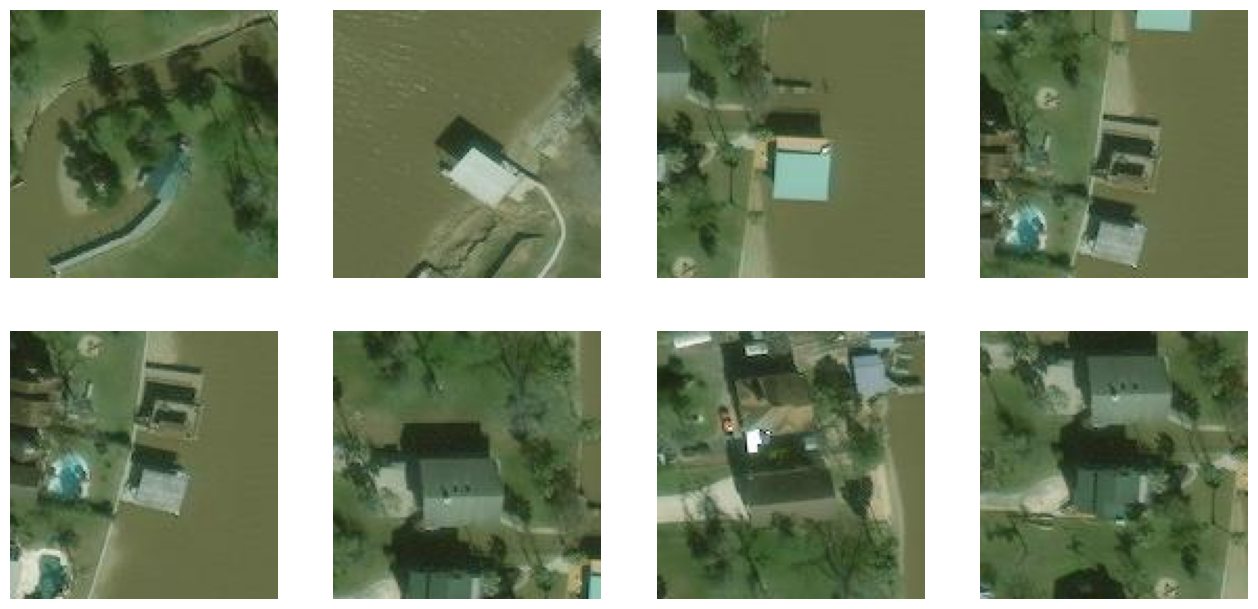

In [10]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
for i, img_path in enumerate(next_no_damage_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


It may not be obvious from looking at the images in this grid but an important note here is that these images come in all shapes and sizes (just like the 'horses or humans' dataset). So before training a neural network with them, you'll need to tweak the images. You'll see that in the next sections.

## Building a Small Model from Scratch to get to ~72% Accuracy

To train a neural network to handle the images, you'll need them to be in a uniform size. You will choose 150x150 pixels for this, and you'll see the code that preprocesses the images to that shape shortly. 

You can define the model by importing Tensorflow and using the Keras API. Here is the entire code first then the discussion comes after. This is very similar to the models you have built in Course 1.


In [11]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('damage') and 1 for the other ('no_damage')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

2023-09-05 21:35:47.987159: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-05 21:35:47.987265: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-05 21:35:47.987284: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-05 21:35:47.987636: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-05 21:35:47.987649: I tensorflow/core/co

You defined a `Sequential` layer as before, adding some convolutional layers first. Note the `input_shape` parameter this time. Here is where you put the `150x150` size and `3` for the color depth because you have colored images. You then add a couple of convolutional layers and flatten the final result to feed into the densely connected layers.

Note that because you are facing a two-class classifidamageion problem, i.e. a *binary classifidamageion problem*, you will end the network with a [*sigmoid* activation](https://wikipedia.org/wiki/Sigmoid_function). The output of the network will be a single scalar between `0` and `1`, encoding the probability that the current image is class `1` (as opposed to class `0`).

You can review the architecture of the network with the `model.summary()` method: 

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

The `output_shape` column shows how the size of your feature map evolves in each successive layer. The convolution operation removes the outermost pixels from the original dimensions, and each pooling layer halves it.

Next, you'll configure the specifidamageions for model training. You will train our model with the `binary_crossentropy` loss, because it's a binary classifidamageion problem and your final activation is a sigmoid. We will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, you will want to monitor classifidamageion accuracy.

**NOTE**: In this case, using the [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

In [13]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

### Data Preprocessing

Next step is to set up the data generators that will read pictures in the source folders, convert them to `float32` tensors, and feed them (with their labels) to the model. You'll have one generator for the training images and one for the validation images. These generators will yield batches of images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network (i.e. It is uncommon to feed raw pixels into a ConvNet.) In this case, you will preprocess the images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras, this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`.

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Training
You will now train on all 2,000 images available, for 15 epochs, and monitor the accuracy as well on the 1,000 images in the validation set.

Do note the values per epoch.

You'll see 4 values per epoch -- Loss, Accuracy, Validation Loss and Validation Accuracy. 

The `loss` and `accuracy` are great indidamageors of progress in training. `loss` measures the current model prediction against the known labels, calculating the result. `accuracy`, on the other hand, is the portion of correct guesses. 


In [15]:
import PIL

In [16]:
import time
start_time = time.time()
# your code here


history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            verbose=2
            )
end_time = time.time()
time_elapsed = end_time - start_time
print("Time taken: ", time_elapsed)

Epoch 1/15


2023-09-05 21:35:51.580798: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-05 21:35:56.803759: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-09-05 21:35:56.813396: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe834b5a0d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-05 21:35:56.813440: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
2023-09-05 21:35:56.831948: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-05 21:35:56.957428: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lif

500/500 - 162s - loss: 0.4726 - accuracy: 0.7706 - val_loss: 0.2518 - val_accuracy: 0.8945 - 162s/epoch - 324ms/step
Epoch 2/15
500/500 - 126s - loss: 0.2320 - accuracy: 0.9042 - val_loss: 0.1905 - val_accuracy: 0.9180 - 126s/epoch - 252ms/step
Epoch 3/15
500/500 - 205s - loss: 0.1688 - accuracy: 0.9317 - val_loss: 0.1545 - val_accuracy: 0.9335 - 205s/epoch - 410ms/step
Epoch 4/15
500/500 - 178s - loss: 0.1349 - accuracy: 0.9472 - val_loss: 0.1408 - val_accuracy: 0.9455 - 178s/epoch - 356ms/step
Epoch 5/15
500/500 - 167s - loss: 0.1130 - accuracy: 0.9562 - val_loss: 0.1512 - val_accuracy: 0.9415 - 167s/epoch - 335ms/step
Epoch 6/15
500/500 - 147s - loss: 0.0916 - accuracy: 0.9664 - val_loss: 0.1495 - val_accuracy: 0.9480 - 147s/epoch - 293ms/step
Epoch 7/15
500/500 - 213s - loss: 0.0719 - accuracy: 0.9747 - val_loss: 0.1644 - val_accuracy: 0.9370 - 213s/epoch - 426ms/step
Epoch 8/15
500/500 - 210s - loss: 0.0569 - accuracy: 0.9824 - val_loss: 0.1876 - val_accuracy: 0.9375 - 210s/epoch 

### Model Training History
In this section I would be plotting the model training history. this way we can know whether or not the model is overfitting, underfitting or just right. The model overfits when the validation accuracy peakes and then starts decreasing. 

2550

### Model Prediction

Now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, upload them, and run them through the model, giving an indidamageion of whether the object is a damage or a no_damage.

_**Note:** Old versions of the Safari browser might have compatibility issues with the code block below. If you get an error after you select the images(s) to upload, you can consider updating your browser to the latest version. If not possible, please comment out or skip the code block below, uncomment the next code block and run it._

In [17]:
model.save("my_model.h5")

/root/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import os
import glob
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

folder_path = "./test_damage_and_no_damage"  # Replace with the path to your local folder
file_paths = glob.glob(os.path.join(folder_path, "*"))

for path in file_paths:
    # predicting images
    img = load_img(path, target_size=(150, 150))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
  
    classes = model.predict(images, batch_size=10)
  
    print(classes[0])
  
    if classes[0]>0.5:
        print(path + " is a no_damage")
    else:
        print(path + " is a damage")

 

If you're using Safari and the cell above throws an error, you will need to upload the images(s) manually in their workspace.

Instructions on how to upload image(s) manually in a Colab:

1. Select the `folder` icon on the left `menu bar`.
2. Click on the `folder with an arrow pointing upwards` named `..`
3. Click on the `folder` named `tmp`.
4. Inside of the `tmp` folder, `create a new folder` called `images`. You'll see the `New folder` option by clicking the `3 vertical dots` menu button next to the `tmp` folder.
5. Inside of the new `images` folder, upload an image(s) of your choice, preferably of either a damage or a no_damage. Drag and drop the images(s) on top of the `images` folder.
6. Uncomment and run the code block below. 

In [19]:
# # CODE BLOCK FOR OLDER VERSIONS OF SAFARI

# import numpy as np
# from tensorflow.keras.utils import load_img, img_to_array
# import os

# images = os.listdir("/tmp/images")

# print(images)

# for i in images:
#  print()
#  # predicting images
#  path = '/tmp/images/' + i
#  img = load_img(path, target_size=(150, 150))
#  x = img_to_array(img)
#  x /= 255
#  x = np.expand_dims(x, axis=0)

#  images = np.vstack([x])
#  classes = model.predict(images, batch_size=10)
#  print(classes[0])
#  if classes[0]>0.5:
#    print(i + " is a no_damage")
#  else:
#    print(i + " is a damage")

### Visualizing Intermediate Representations

To get a feel for what kind of features your CNN has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the model.

You can pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

1/1 [==============================] - 1s 1s/step


/tmp/ipykernel_7417/3958679645.py:48: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()
/tmp/ipykernel_7417/3958679645.py:51: RuntimeWarning: invalid value encountered in cast
  x  = np.clip(x, 0, 255).astype('uint8')


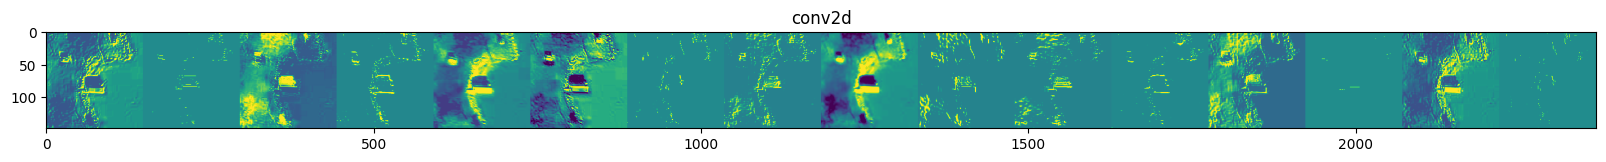

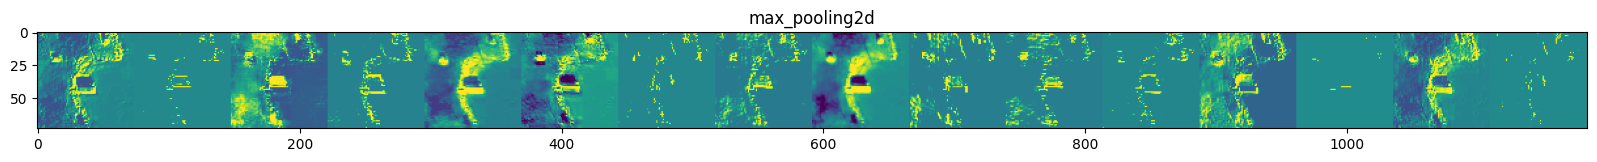

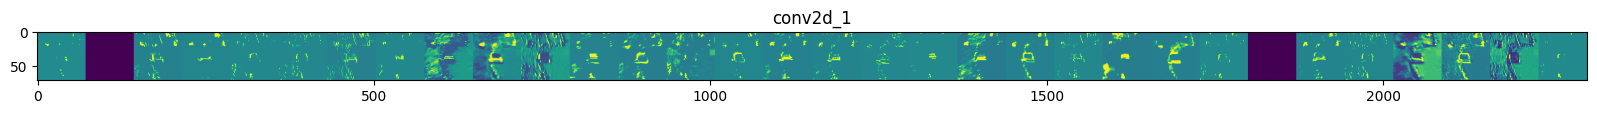

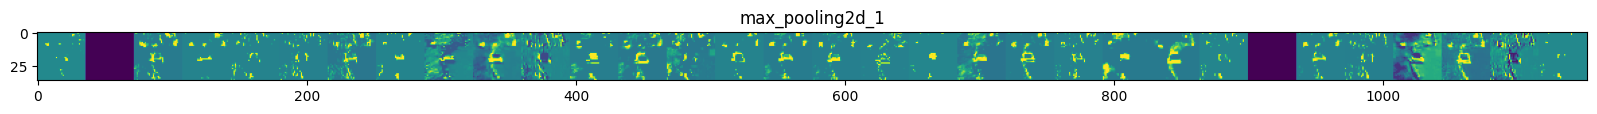

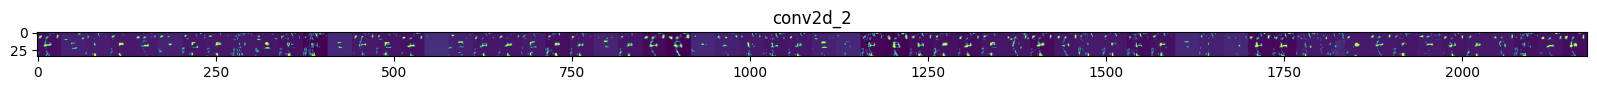

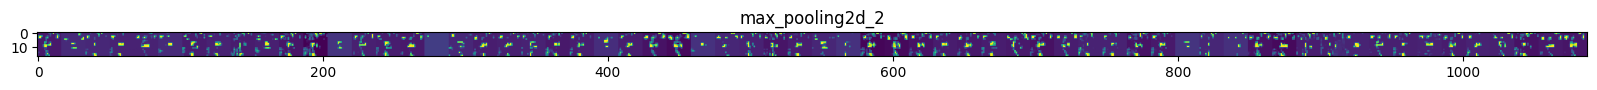

In [20]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
damage_img_files = [os.path.join(train_damage_dir, f) for f in train_damage_fnames]
no_damage_img_files = [os.path.join(train_no_damage_dir, f) for f in train_no_damage_fnames]
img_path = random.choice(damage_img_files + no_damage_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

You can see above how the pixels highlighted turn to increasingly abstract and compact representations, especially at the bottom grid. 

The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called _representation sparsity_ and is a key feature of deep learning. These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline wherein each layer filters out the most useful features.

### Evaluating Accuracy and Loss for the Model

You will plot the training/validation accuracy and loss as collected during training:

Text(0.5, 1.0, 'Training and validation loss')

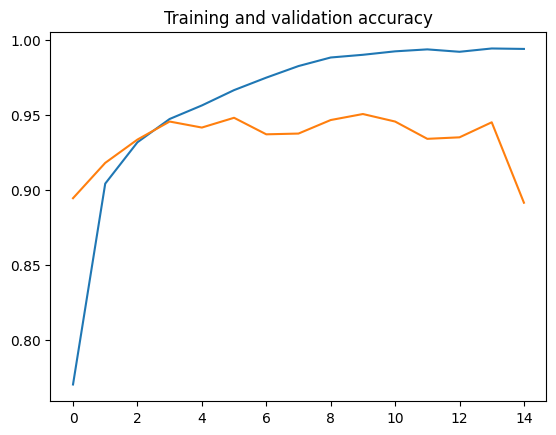

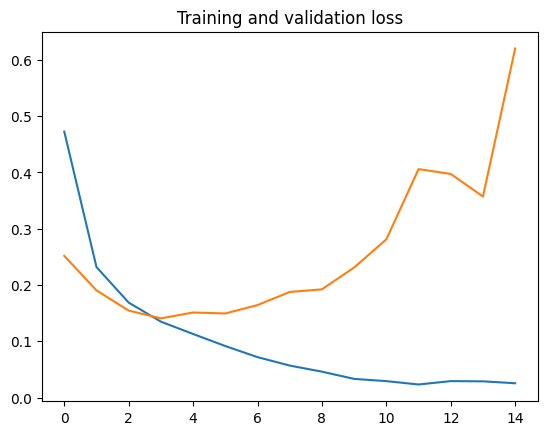

In [21]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

As you can see, the model is **overfitting** like it's getting out of fashion. The training accuracy (in blue) gets close to 100% while the validation accuracy (in orange) stalls as 70%. The validation loss reaches its minimum after only five epochs.

Since you have a relatively small number of training examples (2000), overfitting should be the number one concern. Overfitting happens when a model exposed to too few examples learns patterns that do not generalize to new data, i.e. when the model starts using irrelevant features for making predictions. For instance, if you, as a human, only see three images of people who are lumberjacks, and three images of people who are sailors, and among them the only person wearing a cap is a lumberjack, you might start thinking that wearing a cap is a sign of being a lumberjack as opposed to a sailor. You would then make a pretty lousy lumberjack/sailor classifier.

Overfitting is the central problem in machine learning: given that you are fitting the parameters of our model to a given dataset, how can you make sure that the representations learned by the model will be applicable to data it has never seen before? How do you avoid learning things that are specific to the training data?

In the next exercise, you'll look at ways to prevent overfitting in this classifidamageion model.

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal

os.kill(os.getpid(), signal.SIGKILL)